<div align="center">

  <a href="https://ultralytics.com/yolov5" target="_blank">
    <img width="1024", src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov5/v70/splash.png"></a>


<br>
  <a href="https://bit.ly/yolov5-paperspace-notebook"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"></a>
  <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/segment/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
  <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
<br>

This <a href="https://github.com/ultralytics/yolov5">YOLOv5</a> 🚀 notebook by <a href="https://ultralytics.com">Ultralytics</a> presents simple train, validate and predict examples to help start your AI adventure.<br>See <a href="https://github.com/ultralytics/yolov5/issues/new/choose">GitHub</a> for community support or <a href="https://ultralytics.com/contact">contact us</a> for professional support.

</div>

# Setup

Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.

In [100]:
pwd

'C:\\Users\\v23ASayed2\\Desktop\\Vodafone\\YOLOv5\\yolov5'

In [8]:
import utils

In [6]:
# !git clone https://github.com/ultralytics/yolov5  # clone
# %cd yolov5
# %pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5  v7.0-186-g0acc5cf Python-3.9.13 torch-2.0.1+cpu CPU


Setup complete  (8 CPUs, 15.7 GB RAM, 144.4/146.0 GB disk)


# 1. Predict

`segment/predict.py` runs YOLOv5 instance segmentation inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/predict`. Example inference sources are:

```shell
python segment/predict.py --source 0  # webcam
                             img.jpg  # image 
                             vid.mp4  # video
                             screen  # screenshot
                             path/  # directory
                             'path/*.jpg'  # glob
                             'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                             'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

In [5]:
cd ..

C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5


In [61]:
!python segment/predict.py --weights segment/seg-small.pt --img 640 --conf 0.7 --source C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\202212_C_2021011_16_01091762534_1.jpg --save-txt 
#display.Image(filename='runs/predict-seg/exp/zidane.jpg', width=600)

WARNING  'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING  'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

segment\predict: weights=['segment/cluster.pt'], source=C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\202212_C_2021011_16_01091762534_1.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.7, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\predict-seg, name=exp, exist_ok=False, line_thickness=3, hid

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img align="left" src="https://user-images.githubusercontent.com/26833433/199030123-08c72f8d-6871-4116-8ed3-c373642cf28e.jpg" width="600">

# 2. Validate
Validate a model's accuracy on the [COCO](https://cocodataset.org/#home) dataset's `val` or `test` splits. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases). To show results by class use the `--verbose` flag.

In [ ]:
# Download COCO val
!bash data/scripts/get_coco.sh --val --segments  # download (780M - 5000 images)

######################################################################## 100.0%
######################################################################## 100.0%


In [106]:
# Validate YOLOv5s-seg on COCO val
!python segment/val.py --weights segment/seg-small.pt --data data/custom_data_seg.yaml --img 640 

WARNING  'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING  'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

segment\val: data=data/custom_data_seg.yaml, weights=['segment/seg-small.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs\val-seg, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5  v7.0-186-g0acc5cf Python-3.11.0 torch-2.0.0+cpu CPU

Fusing layers... 
Model summary: 165 layers, 1

# 3. Train

<p align=""><a href="https://roboflow.com/?ref=ultralytics"><img width="1000" src="https://github.com/ultralytics/assets/raw/main/im/integrations-loop.png"/></a></p>
Close the active learning loop by sampling images from your inference conditions with the `roboflow` pip package
<br><br>

Train a YOLOv5s-seg model on the [COCO128](https://www.kaggle.com/ultralytics/coco128) dataset with `--data coco128-seg.yaml`, starting from pretrained `--weights yolov5s-seg.pt`, or from randomly initialized `--weights '' --cfg yolov5s-seg.yaml`.

- **Pretrained [Models](https://github.com/ultralytics/yolov5/tree/master/models)** are downloaded
automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases)
- **[Datasets](https://github.com/ultralytics/yolov5/tree/master/data)** available for autodownload include: [COCO](https://github.com/ultralytics/yolov5/blob/master/data/coco.yaml), [COCO128](https://github.com/ultralytics/yolov5/blob/master/data/coco128.yaml), [VOC](https://github.com/ultralytics/yolov5/blob/master/data/VOC.yaml), [Argoverse](https://github.com/ultralytics/yolov5/blob/master/data/Argoverse.yaml), [VisDrone](https://github.com/ultralytics/yolov5/blob/master/data/VisDrone.yaml), [GlobalWheat](https://github.com/ultralytics/yolov5/blob/master/data/GlobalWheat2020.yaml), [xView](https://github.com/ultralytics/yolov5/blob/master/data/xView.yaml), [Objects365](https://github.com/ultralytics/yolov5/blob/master/data/Objects365.yaml), [SKU-110K](https://github.com/ultralytics/yolov5/blob/master/data/SKU-110K.yaml).
- **Training Results** are saved to `runs/train-seg/` with incrementing run directories, i.e. `runs/train-seg/exp2`, `runs/train-seg/exp3` etc.
<br><br>

A **Mosaic Dataloader** is used for training which combines 4 images into 1 mosaic.

## Train on Custom Data with Roboflow 🌟 NEW

[Roboflow](https://roboflow.com/?ref=ultralytics) enables you to easily **organize, label, and prepare** a high quality dataset with your own custom data. Roboflow also makes it easy to establish an active learning pipeline, collaborate with your team on dataset improvement, and integrate directly into your model building workflow with the `roboflow` pip package.

- Custom Training Example: [https://blog.roboflow.com/train-yolov5-instance-segmentation-custom-dataset/](https://blog.roboflow.com/train-yolov5-instance-segmentation-custom-dataset/?ref=ultralytics)
- Custom Training Notebook: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1JTz7kpmHsg-5qwVz2d2IH3AaenI1tv0N?usp=sharing)
<br>

<p align=""><a href="https://roboflow.com/?ref=ultralytics"><img width="480" src="https://robflow-public-assets.s3.amazonaws.com/how-to-train-yolov5-segmentation-annotation.gif"/></a></p>Label images lightning fast (including with model-assisted labeling)

In [ ]:
#@title Select YOLOv5 🚀 logger {run: 'auto'}
logger = 'Comet' #@param ['Comet', 'ClearML', 'TensorBoard']

if logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'ClearML':
  %pip install -q clearml
  import clearml; clearml.browser_login()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir runs/train

In [6]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [7]:
# Train YOLOv5s on COCO128 for 3 epochs
!python segment/train.py --img 640 --batch 16 --epochs 3 --data data/custom_data_seg.yaml --weights yolov5n-seg.pt --device cpu --cache

^C


# 4. Visualize

## Comet Logging and Visualization 🌟 NEW

[Comet](https://www.comet.com/site/lp/yolov5-with-comet/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab) is now fully integrated with YOLOv5. Track and visualize model metrics in real time, save your hyperparameters, datasets, and model checkpoints, and visualize your model predictions with [Comet Custom Panels](https://www.comet.com/docs/v2/guides/comet-dashboard/code-panels/about-panels/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab)! Comet makes sure you never lose track of your work and makes it easy to share results and collaborate across teams of all sizes!

Getting started is easy:
```shell
pip install comet_ml  # 1. install
export COMET_API_KEY=<Your API Key>  # 2. paste API key
python train.py --img 640 --epochs 3 --data coco128.yaml --weights yolov5s.pt  # 3. train
```
To learn more about all of the supported Comet features for this integration, check out the [Comet Tutorial](https://docs.ultralytics.com/yolov5/tutorials/comet_logging_integration). If you'd like to learn more about Comet, head over to our [documentation](https://www.comet.com/docs/v2/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab). Get started by trying out the Comet Colab Notebook:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1RG0WOQyxlDlo5Km8GogJpIEJlg_5lyYO?usp=sharing)

<a href="https://bit.ly/yolov5-readme-comet2">
<img alt="Comet Dashboard" src="https://user-images.githubusercontent.com/26833433/202851203-164e94e1-2238-46dd-91f8-de020e9d6b41.png" width="1280"/></a>

## ClearML Logging and Automation 🌟 NEW

[ClearML](https://cutt.ly/yolov5-notebook-clearml) is completely integrated into YOLOv5 to track your experimentation, manage dataset versions and even remotely execute training runs. To enable ClearML (check cells above):

- `pip install clearml`
- run `clearml-init` to connect to a ClearML server (**deploy your own [open-source server](https://github.com/allegroai/clearml-server)**, or use our [free hosted server](https://cutt.ly/yolov5-notebook-clearml))

You'll get all the great expected features from an experiment manager: live updates, model upload, experiment comparison etc. but ClearML also tracks uncommitted changes and installed packages for example. Thanks to that ClearML Tasks (which is what we call experiments) are also reproducible on different machines! With only 1 extra line, we can schedule a YOLOv5 training task on a queue to be executed by any number of ClearML Agents (workers).

You can use ClearML Data to version your dataset and then pass it to YOLOv5 simply using its unique ID. This will help you keep track of your data without adding extra hassle. Explore the [ClearML Tutorial](https://docs.ultralytics.com/yolov5/tutorials/clearml_logging_integration) for details!

<a href="https://cutt.ly/yolov5-notebook-clearml">
<img alt="ClearML Experiment Management UI" src="https://github.com/thepycoder/clearml_screenshots/raw/main/scalars.jpg" width="1280"/></a>

## Local Logging

Training results are automatically logged with [Tensorboard](https://www.tensorflow.org/tensorboard) and [CSV](https://github.com/ultralytics/yolov5/pull/4148) loggers to `runs/train`, with a new experiment directory created for each new training as `runs/train/exp2`, `runs/train/exp3`, etc.

This directory contains train and val statistics, mosaics, labels, predictions and augmentated mosaics, as well as metrics and charts including precision-recall (PR) curves and confusion matrices. 

<img alt="Local logging results" src="https://user-images.githubusercontent.com/26833433/183222430-e1abd1b7-782c-4cde-b04d-ad52926bf818.jpg" width="1280"/>


# Environments

YOLOv5 may be run in any of the following up-to-date verified environments (with all dependencies including [CUDA](https://developer.nvidia.com/cuda)/[CUDNN](https://developer.nvidia.com/cudnn), [Python](https://www.python.org/) and [PyTorch](https://pytorch.org/) preinstalled):

- **Notebooks** with free GPU: <a href="https://bit.ly/yolov5-paperspace-notebook"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"></a> <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a> <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
- **Google Cloud** Deep Learning VM. See [GCP Quickstart Guide](https://docs.ultralytics.com/yolov5/environments/google_cloud_quickstart_tutorial/)
- **Amazon** Deep Learning AMI. See [AWS Quickstart Guide](https://docs.ultralytics.com/yolov5/environments/aws_quickstart_tutorial/)
- **Docker Image**. See [Docker Quickstart Guide](https://docs.ultralytics.com/yolov5/environments/docker_image_quickstart_tutorial/) <a href="https://hub.docker.com/r/ultralytics/yolov5"><img src="https://img.shields.io/docker/pulls/ultralytics/yolov5?logo=docker" alt="Docker Pulls"></a>


# Status

![YOLOv5 CI](https://github.com/ultralytics/yolov5/actions/workflows/ci-testing.yml/badge.svg)

If this badge is green, all [YOLOv5 GitHub Actions](https://github.com/ultralytics/yolov5/actions) Continuous Integration (CI) tests are currently passing. CI tests verify correct operation of YOLOv5 training ([train.py](https://github.com/ultralytics/yolov5/blob/master/train.py)), testing ([val.py](https://github.com/ultralytics/yolov5/blob/master/val.py)), inference ([detect.py](https://github.com/ultralytics/yolov5/blob/master/detect.py)) and export ([export.py](https://github.com/ultralytics/yolov5/blob/master/export.py)) on macOS, Windows, and Ubuntu every 24 hours and on every commit.


# Appendix

Additional content below.

In [10]:
# YOLOv5 PyTorch HUB Inference (DetectionModels only)
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s-seg')  # yolov5n - yolov5x6 or custom
im = 'https://ultralytics.com/images/zidane.jpg'  # file, Path, PIL.Image, OpenCV, nparray, list
results = model(im)  # inference
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

Using cache found in C:\Users\v23ASayed2/.cache\torch\hub\ultralytics_yolov5_master


RuntimeError: Cannot find callable yolov5s-seg in hubconf

In [2]:
cd ..

C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5


In [7]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from imutils.perspective import four_point_transform
import matplotlib.pyplot as plt
import dlib
import numpy as np
from ModelUnetPlus import CreateModel
from ModelUnetPlus import PrepareImage
from ModelUnetPlus import PrepareImage_2
import imutils
import cv2
import warnings
warnings.filterwarnings("ignore")

In [7]:
# import the necessary packages
from pyimagesearch.helpers import convert_and_trim_bb
import argparse
import imutils
import time
import dlib
import cv2
# construct the argument parser and parse the arguments


def face_detection(image):
	
	# load dlib's HOG + Linear SVM face detector
	detector = dlib.get_frontal_face_detector()
	# load the input image from disk, resize it, and convert it from
	# BGR to RGB channel ordering (which is what dlib expects)
	image = cv2.imread(image)
	image = imutils.resize(image, width=600)
	rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	# perform face detection using dlib's face detector
	
	rects = detector(rgb, 1)
	
	return rects




In [5]:
cd FaceCropes


C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\FaceCropes


In [6]:
print(len(face_detection(r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\front_inverted.jpg')))

0


In [74]:
from crop_face import detect_id_face
# be sure to change paths in detect_id_face

face_result = detect_id_face( r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\front_inverted.jpg' , False )
print(face_result)

cpu
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\FaceCropes\weights/yolov5n_state_dict.pt
Sucsessful detection
(1, [[[[1024, 599], [1018, 592], [1025, 567], [1030, 524], [1021, 522]]]], [[[960, 488, 1079, 659]]])


In [28]:
!python segment/predict.py --retina-masks --weights segment/seg-small.pt --conf 0.7 --source C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\inverted.jpg --save-txt 


WARNING  'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING  'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

segment\predict: weights=['segment/seg-small.pt'], source=C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\inverted.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.7, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_co

# checking the dimensions of the original image

In [7]:
from PIL import Image

image = cv2.imread(r"C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\inverted.jpg")  # Replace "your_image.jpg" with the path to your image file
# width, height = image.size

print(f"Width: {image.shape[1]}px")
print(f"Height: {image.shape[0]}px")


Width: 1700px
Height: 2200px


In [63]:
image = PrepareImage_2(r"C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\both_inverted.jpg")
# Assuming TestData is your image path



2339


# Denormalize the points 

In [103]:
from PIL import Image
from ModelUnetPlus import PrepareImage_2
# Load the image
image = cv2.imread(r"C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\202212_C_2021011_16_01091762534_1.jpg")
image_width, image_height = image.shape[1],image.shape[0]
print(image_width,image_height)
# Input and output file paths
input_file_path = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\runs\predict-seg\exp49\labels\both_inverted.txt'  # Replace with your input file path
output_file_path = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\denormalized.txt'  # Replace with your output file path

# Function to denormalize coordinates
def denormalize_coordinates(x, y):
    denormalized_x = x * 640 * (image_width/640)
    denormalized_y = y * 640 * (image_height/640)
    return denormalized_x, denormalized_y

# Open input and output files
with open(input_file_path, 'r') as input_file, open(output_file_path, 'w') as output_file:
    for line in input_file:
        # Split the line into elements
        elements = line.strip().split()

        # Extract the class label
        class_label = elements[0]

        # Denormalize and format the coordinates
        denormalized_coords = [denormalize_coordinates(float(elements[i]), float(elements[i+1])) for i in range(1, len(elements), 2)]

        # Create a new line with denormalized data
        denormalized_line = f"{class_label} {' '.join([f'{x} {y}' for x, y in denormalized_coords])}\n"

        # Write the denormalized line to the output file
        output_file.write(denormalized_line)

print("Denormalization complete. Data saved to output.txt.")

1700 2200


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\v23ASayed2\\Desktop\\Vodafone\\YOLOv5\\yolov5\\runs\\predict-seg\\exp49\\labels\\both_inverted.txt'

# put commas between numbers to make them in points format

In [65]:
# Define the input and output file names
input_file_name = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\denormalized.txt'
output_class_0_file_name = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\class_0_points.txt'
output_class_1_file_name = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\class_1_points.txt'

# Initialize lists to store points for class 0 and class 1
class_0_points = []
class_1_points = []

# Open the input file for reading
with open(input_file_name, 'r') as input_file:
    for line in input_file:
        # Split each line into class label and points
        parts = line.strip().split()
        class_label = int(parts[0])
        points = [float(part) for part in parts[1:]]

        # Check the class label and add points to the corresponding list
        if class_label == 0:
            class_0_points.extend(points)
        elif class_label == 1:
            class_1_points.extend(points)

# Convert the lists to strings with commas
class_0_points_str = ', '.join(map(str, class_0_points))
class_1_points_str = ', '.join(map(str, class_1_points))

# Write the class 0 points to the output file
with open(output_class_0_file_name, 'w') as output_file:
    output_file.write(class_0_points_str)

# Write the class 1 points to the output file
with open(output_class_1_file_name, 'w') as output_file:
    output_file.write(class_1_points_str)

print("Points extracted and saved to separate files.")


Points extracted and saved to separate files.


# creating front and back masks

In [66]:
import cv2
import numpy as np

# Load the points for class 0 and class 1 from their respective text files
points_class_0 = np.loadtxt(output_class_0_file_name, delimiter=",")
points_class_1 = np.loadtxt(output_class_1_file_name, delimiter=",")



# Create an empty binary mask for class 0 with the desired size
back_mask = np.zeros(image.shape[:2], dtype=np.uint8)

# Create an empty binary mask for class 1 with the desired size
front_mask = np.zeros(image.shape[:2], dtype=np.uint8)

# Define the color for drawing the polygons (you can change this color)
color = (255, 255, 255)  # White

# Fill the masks with polygons based on the points
cv2.fillPoly(back_mask, [points_class_0.astype(int).reshape((-1, 1, 2))], color)
cv2.fillPoly(front_mask, [points_class_1.astype(int).reshape((-1, 1, 2))], color)

# Save the resized binary masks as images
cv2.imwrite("back_mask.png", back_mask)
cv2.imwrite("front_mask.png", front_mask)

# If you combined masks, you can save the combined resized mask as well
# combined_mask = resized_mask_class_0 | resized_mask_class_1
# cv2.imwrite("resized_combined_mask.png", combined_mask)

# Display the resized binary masks (optional)
cv2.imshow("Mask for Class 0", back_mask)
cv2.imshow("Mask for Class 1", front_mask)
# cv2.imshow("Resized Combined Mask", resized_combined_mask)  # If you have combined masks

cv2.waitKey(0)
cv2.destroyAllWindows()
print(mask_class_0.shape)

(2200, 1700)


In [53]:
back_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

# contour approximation

In [17]:
def AprroxmateContour(thresh):
    """
    getting the approxmate corner for predicted mask to get the perspective of contour 

    Parameters
        ----------
        thresh : array int( binary image  (0 or 1 ) )
             binary image is refer to the predicted mask 
             

    Returns 

        -  four corner approxmation for contour 


    """
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    print(cnts)
    cnts = imutils.grab_contours(cnts)

    # get contour which have  max area 
    c = max(cnts, key=cv2.contourArea)

    # approxmate corner of contour
    for eps in np.linspace(0.001, 0.05, 100):
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, eps * peri, True)
        if len(approx) == 4:
            break
        
    if len(approx) !=4 :
#         approx =  get_corners(approx)
        
        raise Exception("Corners not found.")        
#         print('hello')
    return approx

In [18]:
pwd

'C:\\Users\\v23ASayed2\\Desktop\\Vodafone\\YOLOv5\\yolov5'

# Scanning function

In [10]:
!python segment/predict.py --retina-masks --weights segment/seg-small.pt --conf 0.7 --source C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\problems\202211_C_2021011_20_01027553296_1.jpg --save-txt 

^C


In [6]:
def Scan(view , image_path):
    image = PrepareImage_2(image_path) # Assuming TestData is your image path
    image_width, image_height = image.shape[1],image.shape[0]
    image_filename = os.path.basename(image_path)
    # Input and output file paths
    input_file_path = os.path.join(r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\runs\predict-seg\exp23\labels',f"{os.path.splitext(image_filename)[0]}.txt")
    if not os.path.exists(input_file_path):
        print("No ID detected (label file not found)")
        return  # Exit the function if label file doesn't exist
    output_file_path = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\denormalized.txt'  # Replace with your output file path

    # Function to denormalize coordinates
    def denormalize_coordinates(x, y):
        denormalized_x = x * 640 * (image_width/640)
        denormalized_y = y * 640 * (image_height/640)
        return denormalized_x, denormalized_y

    # Open input and output files
    with open(input_file_path, 'r') as input_file, open(output_file_path, 'w') as output_file:
        for line in input_file:
            # Split the line into elements
            elements = line.strip().split()

            # Extract the class label
            class_label = elements[0]

            # Denormalize and format the coordinates
            denormalized_coords = [denormalize_coordinates(float(elements[i]), float(elements[i+1])) for i in range(1, len(elements), 2)]

            # Create a new line with denormalized data
            denormalized_line = f"{class_label} {' '.join([f'{x} {y}' for x, y in denormalized_coords])}\n"

            # Write the denormalized line to the output file
            output_file.write(denormalized_line)

    print("Denormalization complete. Data saved to output.txt.")    
    # Define the input and output file names
    input_file_name = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\denormalized.txt'
    output_class_0_file_name = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\class_0_points.txt'
    output_class_1_file_name = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\class_1_points.txt'

    # Initialize lists to store points for class 0 and class 1
    class_0_points = []
    class_1_points = []

    # Open the input file for reading
    with open(input_file_name, 'r') as input_file:
        for line in input_file:
            # Split each line into class label and points
            parts = line.strip().split()
            class_label = int(parts[0])
            points = [float(part) for part in parts[1:]]

            # Check the class label and add points to the corresponding list
            if class_label == 0:
                class_0_points.extend(points)
            elif class_label == 1:
                class_1_points.extend(points)

    # Convert the lists to strings with commas
    class_0_points_str = ', '.join(map(str, class_0_points))
    class_1_points_str = ', '.join(map(str, class_1_points))

    # Write the class 0 points to the output file
    with open(output_class_0_file_name, 'w') as output_file:
        output_file.write(class_0_points_str)

    # Write the class 1 points to the output file
    with open(output_class_1_file_name, 'w') as output_file:
        output_file.write(class_1_points_str)

    print("Points extracted and saved to separate files.")
    # Load the points for class 0 and class 1 from their respective text files
    points_class_0 = np.loadtxt(output_class_0_file_name, delimiter=",")
    points_class_1 = np.loadtxt(output_class_1_file_name, delimiter=",")



    # Create an empty binary mask for class 0 with the desired size
    back_mask = np.zeros(image.shape[:2], dtype=np.uint8)

    # Create an empty binary mask for class 1 with the desired size
    front_mask = np.zeros(image.shape[:2], dtype=np.uint8)

    # Define the color for drawing the polygons (you can change this color)
    color = (255, 255, 255)  # White

    # Fill the masks with polygons based on the points
    if len(points_class_0) > 0:
        cv2.fillPoly(back_mask, [points_class_0.astype(int).reshape((-1, 1, 2))], color)

    if len(points_class_1) > 0:
        cv2.fillPoly(front_mask, [points_class_1.astype(int).reshape((-1, 1, 2))], color)
        
    # Check if the selected view matches the class in the label file
    if view == 'front' and len(points_class_1) == 0:
        print("This is a back ID image (class 1 not found)")
        return
    elif view == 'back' and len(points_class_0) == 0:
        print("This is a front ID image (class 0 not found)")
        return

    # Save the resized binary masks as images
    cv2.imwrite("back_mask.png", back_mask)
    cv2.imwrite("front_mask.png", front_mask)
    if view == 'front':
        
        Corner = AprroxmateContour(front_mask)
        result = four_point_transform(image, Corner.reshape(4, 2))
        res_shape=result.shape
        if res_shape[0] > res_shape[1]:
            result = cv2.rotate(result, cv2.ROTATE_90_CLOCKWISE)
        res_shape = result.shape
        result_path = r"C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\result.jpg"
        # save result image to face recogination
        cv2.imwrite(result_path , result)

        %cd FaceCropes
        from crop_face import detect_id_face
        # be sure to change paths in detect_id_face

        face_result = detect_id_face( result_path , False )
        %cd ..



        if face_result[0] == 1:
            # x , y the center of face detection
            x   = (face_result[2][0][0][0]+face_result[2][0][0][2])/2
            y   = (face_result[2][0][0][1]+face_result[2][0][0][3])/2


            if ((y > (res_shape[0]/2)) or (x >(res_shape[1]/2))) :
                result = cv2.rotate(result, cv2.ROTATE_180)


        else:
            result = cv2.rotate(result, cv2.ROTATE_180)
        result_path = r"C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\front.jpg"
        cv2.imwrite(result_path,result)
        
        
    elif view == 'back':
        Corner = AprroxmateContour(back_mask)
        result = four_point_transform(image, Corner.reshape(4, 2))
        res_shape=result.shape
        if res_shape[0] > res_shape[1]:
            result = cv2.rotate(result, cv2.ROTATE_90_CLOCKWISE)
        res_shape = result.shape
        result_path = r"C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\result.jpg"
        # save result image to face recogination
        cv2.imwrite(result_path , result)       
        im_gray = cv2.cvtColor(np.array(cv2.imread(r"C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\result.jpg")), cv2.COLOR_RGB2GRAY)
        ret, thresh_img = cv2.threshold(im_gray, 127, 255, cv2.THRESH_BINARY_INV)
        # Calculate the height of the image
        height = thresh_img.shape[0]

        # Split the image into top and bottom halves
        top_half = thresh_img[0:height//2, :]
        bottom_half = thresh_img[height//2:, :]

        # Count the white pixels in each half
        white_pixels_top = cv2.countNonZero(top_half)
        white_pixels_bottom = cv2.countNonZero(bottom_half)

        # Compare white pixels and decide whether to rotate
        if white_pixels_top > white_pixels_bottom:
            rotated_image = cv2.rotate(result, cv2.ROTATE_180)
            print("Rotating image 180 degrees.")
        else:
            rotated_image = result
            print("Keeping image as it is.")
        result_path = r"C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\back.jpg"
        cv2.imwrite(result_path,rotated_image)

    



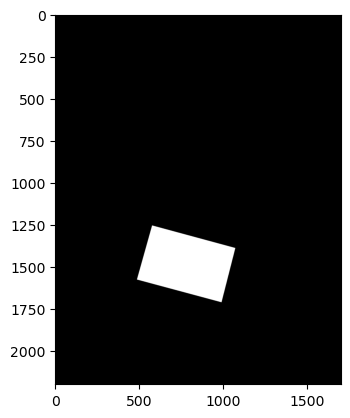

True

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Custom function to approximate corners (provided by you)
def ApproximateContour(thresh):
    """
    Getting the approximate corners for the predicted mask to get the perspective of the contour.
    """
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    # Get the contour with the maximum area
    c = max(cnts, key=cv2.contourArea)

    # Approximate the corners of the contour
    for eps in np.linspace(0.001, 0.05, 100):
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, eps * peri, True)

    return approx

# Load the mask image
mask = cv2.imread(r"C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\front_mask.png")

# Convert the image to grayscale (assuming it's not already in grayscale)
gray_mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

# Get the corners using your custom function
Corner = ApproximateContour(gray_mask)

# Create a black image of the same size as the mask
result_mask = np.zeros_like(gray_mask)

# Initialize variables to store the points for lines
line_points = []

# Find four points that form three lines with approximately 90-degree angles
if Corner is not None and len(Corner) >= 4:
    for i in range(len(Corner)):
        p1 = Corner[i][0]
        p2 = Corner[(i + 1) % len(Corner)][0]
        p3 = Corner[(i + 2) % len(Corner)][0]

        # Calculate the angles between the lines
        angle1 = np.degrees(np.arctan2(p2[1] - p1[1], p2[0] - p1[0]))
        angle2 = np.degrees(np.arctan2(p3[1] - p2[1], p3[0] - p2[0]))

        # Check if the angles are approximately 90 degrees
        if 70 < abs(angle1 - angle2) < 95:
            line_points.extend([p1, p2, p3])
            cv2.line(mask, tuple(p1), tuple(p2), (0, 0, 255), 2)
            cv2.line(mask, tuple(p2), tuple(p3), (0, 0, 255), 2)

# Find the convex hull of the line points
hull = cv2.convexHull(np.array(line_points), returnPoints=True)

# Fill the enclosed shape with white pixels in the result mask
cv2.fillPoly(result_mask, [hull], 255)

# Show the result mask
plt.imshow(result_mask, cmap='gray')
plt.show()

# Save the result mask with the name 'test.png'
cv2.imwrite('test.png', result_mask)


Lines opposite to Line 2 and Line 3: [0, 3]


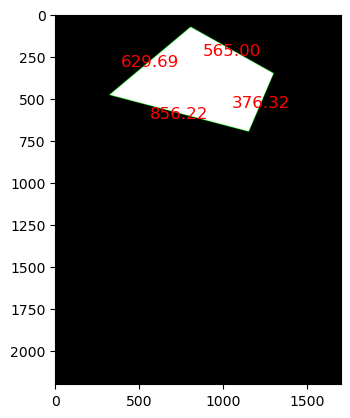

565.0
565.0


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Custom function to approximate corners (provided by you)
def ApproximateContour(thresh):
    """
    Getting the approximate corners for the predicted mask to get the perspective of the contour.
    """
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    # Get the contour with the maximum area
    c = max(cnts, key=cv2.contourArea)

    # Approximate the corners of the contour
    for eps in np.linspace(0.001, 0.05, 100):
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, eps * peri, True)

    return approx

# Load the mask image
mask = cv2.imread(r"C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\test.png")

# Convert the image to grayscale (assuming it's not already in grayscale)
gray_mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

# Get the corners using your custom function
corner = ApproximateContour(gray_mask)

# Plot the original mask
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))

# Initialize a list to store line lengths
line_lengths = []

# Plot the final points of the approximated shape in red and calculate line lengths
if corner is not None and len(corner) >= 4:
    for i in range(len(corner)):
        p1 = corner[i][0]
        p2 = corner[(i + 1) % len(corner)][0]
        cv2.line(mask, tuple(p1), tuple(p2), (0, 255, 0), 2)
        
        # Calculate the length of the line (Euclidean distance)
        length = np.linalg.norm(np.array(p2) - np.array(p1))
        line_lengths.append(length)
        
        # Annotate the length on the plot
        text_x = (p1[0] + p2[0]) / 2
        text_y = (p1[1] + p2[1]) / 2
        plt.text(text_x, text_y, f"{length:.2f}", color='red', fontsize=12, ha='center', va='center')

# Determine which lines are opposite to Lines 2 and 3 (Lines 1 and 4)
opposite_lines = [0, 3]  # Assuming Lines 1 and 4 are opposite

# Assign the lengths of Lines 2 and 3 to opposite lines (Lines 1 and 4)
for opposite_line_index in opposite_lines:
    line_lengths[opposite_line_index] = line_lengths[1]  # Assign Line 2 length
    line_lengths[opposite_line_index] = line_lengths[2]  # Assign Line 3 length


print("Lines opposite to Line 2 and Line 3:", opposite_lines)

# Show the modified mask with red lines indicating the corners and annotated lengths
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.show()
print(line_lengths[0])
print(line_lengths[3])

# running the segmentation model on images with parallelization

In [96]:
image_path = r"C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\results\front\202212_C_2021011_25_01024195083_1.jpg"
Scan('front',image_path)


Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[218, 152]],

       [[216, 154]],

       [[215, 154]],

       [[214, 155]],

       [[213, 155]],

       [[211, 157]],

       [[210, 157]],

       [[209, 158]],

       [[208, 158]],

       [[207, 159]],

       [[203, 159]],

       [[202, 160]],

       [[201, 160]],

       [[200, 161]],

       [[198, 161]],

       [[197, 162]],

       [[196, 162]],

       [[195, 163]],

       [[193, 163]],

       [[192, 164]],

       [[189, 164]],

       [[187, 166]],

       [[186, 166]],

       [[185, 167]],

       [[183, 167]],

       [[182, 168]],

       [[179, 168]],

       [[178, 169]],

       [[177, 169]],

       [[176, 170]],

       [[175, 170]],

       [[174, 171]],

       [[173, 171]],

       [[172, 172]],

       [[168, 172]],

       [[167, 173]],

       [[166, 173]],

       [[165, 174]],

       [[164, 174]],

       [[163, 175]],

       [[162, 175]],

In [8]:
cd yolov5

C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5


# Scanning folder function

In [ ]:
import subprocess
from multiprocessing import Pool
import os

def run_prediction(image_path):
    command = f"!python segment/predict.py --retina-masks --weights segment/big_model_2nd_batch.pt --conf 0.9 --source {image_path} --save-txt"
    subprocess.run(command, shell=True)

if __name__ == '__main__':
    image_folder = 'C:/Users/v23ASayed2/Desktop/Vodafone/National_IDs_splitting/images'
    image_files = [os.path.join(image_folder, img) for img in os.listdir(image_folder)]
    
    with Pool(processes=4) as pool:
        pool.map(run_prediction, image_files)


In [9]:
!python segment/predict.py --retina-masks --weights segment/big_model_2nd_batch.pt --conf 0.9 --source C:\Users\v23ASayed2\Desktop\Vodafone\National_IDs_splitting\images --save-txt

^C


In [19]:
def Scan_Folder(view , image_path,output_folder):
    image = PrepareImage_2(image_path) # Assuming TestData is your image path
    image_width, image_height = image.shape[1],image.shape[0]
    image_filename = os.path.basename(image_path)
    # Input and output file paths
    input_file_path = os.path.join(r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\runs\predict-seg\exp24\labels',f"{os.path.splitext(image_filename)[0]}.txt")
    if not os.path.exists(input_file_path):
        print("No ID detected (label file not found)")
        return  # Exit the function if label file doesn't exist
    output_file_path = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\denormalized.txt'  # Replace with your output file path

    # Function to denormalize coordinates
    def denormalize_coordinates(x, y):
        denormalized_x = x * 640 * (image_width/640)
        denormalized_y = y * 640 * (image_height/640)
        return denormalized_x, denormalized_y

    # Open input and output files
    with open(input_file_path, 'r') as input_file, open(output_file_path, 'w') as output_file:
        for line in input_file:
            # Split the line into elements
            elements = line.strip().split()

            # Extract the class label
            class_label = elements[0]

            # Denormalize and format the coordinates
            denormalized_coords = [denormalize_coordinates(float(elements[i]), float(elements[i+1])) for i in range(1, len(elements), 2)]

            # Create a new line with denormalized data
            denormalized_line = f"{class_label} {' '.join([f'{x} {y}' for x, y in denormalized_coords])}\n"

            # Write the denormalized line to the output file
            output_file.write(denormalized_line)

    print("Denormalization complete. Data saved to output.txt.")    
    # Define the input and output file names
    input_file_name = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\denormalized.txt'
    output_class_0_file_name = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\class_0_points.txt'
    output_class_1_file_name = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\class_1_points.txt'

    # Initialize lists to store points for class 0 and class 1
    class_0_points = []
    class_1_points = []

    # Open the input file for reading
    with open(input_file_name, 'r') as input_file:
        for line in input_file:
            # Split each line into class label and points
            parts = line.strip().split()
            class_label = int(parts[0])
            points = [float(part) for part in parts[1:]]

            # Check the class label and add points to the corresponding list
            if class_label == 0:
                class_0_points.extend(points)
            elif class_label == 1:
                class_1_points.extend(points)

    # Convert the lists to strings with commas
    class_0_points_str = ', '.join(map(str, class_0_points))
    class_1_points_str = ', '.join(map(str, class_1_points))

    # Write the class 0 points to the output file
    with open(output_class_0_file_name, 'w') as output_file:
        output_file.write(class_0_points_str)

    # Write the class 1 points to the output file
    with open(output_class_1_file_name, 'w') as output_file:
        output_file.write(class_1_points_str)

    print("Points extracted and saved to separate files.")
    # Load the points for class 0 and class 1 from their respective text files
    points_class_0 = np.loadtxt(output_class_0_file_name, delimiter=",")
    points_class_1 = np.loadtxt(output_class_1_file_name, delimiter=",")



    # Create an empty binary mask for class 0 with the desired size
    back_mask = np.zeros(image.shape[:2], dtype=np.uint8)

    # Create an empty binary mask for class 1 with the desired size
    front_mask = np.zeros(image.shape[:2], dtype=np.uint8)

    # Define the color for drawing the polygons (you can change this color)
    color = (255, 255, 255)  # White

    # Fill the masks with polygons based on the points
    if len(points_class_0) > 0:
        cv2.fillPoly(back_mask, [points_class_0.astype(int).reshape((-1, 1, 2))], color)

    if len(points_class_1) > 0:
        cv2.fillPoly(front_mask, [points_class_1.astype(int).reshape((-1, 1, 2))], color)
        
    # Check if the selected view matches the class in the label file
    if view == 'front' and len(points_class_1) == 0:
        print("This is a back ID image (class 1 not found)")
        return
    elif view == 'back' and len(points_class_0) == 0:
        print("This is a front ID image (class 0 not found)")
        return

    # Save the resized binary masks as images
    cv2.imwrite("back_mask.png", back_mask)
    cv2.imwrite("front_mask.png", front_mask)
    if view == 'front':
        
        Corner = AprroxmateContour(front_mask)
        result = four_point_transform(image, Corner.reshape(4, 2))
        res_shape=result.shape
        if res_shape[0] > res_shape[1]:
            result = cv2.rotate(result, cv2.ROTATE_90_CLOCKWISE)
        res_shape = result.shape
        result_path = r"C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\result.jpg"
        # save result image to face recogination
        cv2.imwrite(result_path , result)

        %cd FaceCropes
        from crop_face import detect_id_face
        # be sure to change paths in detect_id_face

        face_result = detect_id_face( result_path , False )
        %cd ..



        if face_result[0] == 1:
            # x , y the center of face detection
            x   = (face_result[2][0][0][0]+face_result[2][0][0][2])/2
            y   = (face_result[2][0][0][1]+face_result[2][0][0][3])/2


            if ((y > (res_shape[0]/2)) or (x >(res_shape[1]/2))) :
                result = cv2.rotate(result, cv2.ROTATE_180)


        else:
            result = cv2.rotate(result, cv2.ROTATE_180)
        result_path = os.path.join(output_folder, 'front', os.path.basename(image_path))
        cv2.imwrite(result_path,result)
        
        
    elif view == 'back':
        Corner = AprroxmateContour(back_mask)
        result = four_point_transform(image, Corner.reshape(4, 2))
        res_shape=result.shape
        if res_shape[0] > res_shape[1]:
            result = cv2.rotate(result, cv2.ROTATE_90_CLOCKWISE)
        res_shape = result.shape
        result_path = r"C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\result.jpg"
        # save result image to face recogination
        cv2.imwrite(result_path , result)       
        im_gray = cv2.cvtColor(np.array(cv2.imread(r"C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\result.jpg")), cv2.COLOR_RGB2GRAY)
        ret, thresh_img = cv2.threshold(im_gray, 127, 255, cv2.THRESH_BINARY_INV)
        # Calculate the height of the image
        height = thresh_img.shape[0]

        # Split the image into top and bottom halves
        top_half = thresh_img[0:height//2, :]
        bottom_half = thresh_img[height//2:, :]

        # Count the white pixels in each half
        white_pixels_top = cv2.countNonZero(top_half)
        white_pixels_bottom = cv2.countNonZero(bottom_half)

        # Compare white pixels and decide whether to rotate
        if white_pixels_top > white_pixels_bottom:
            rotated_image = cv2.rotate(result, cv2.ROTATE_180)
            print("Rotating image 180 degrees.")
        else:
            rotated_image = result
            print("Keeping image as it is.")
        result_path = os.path.join(output_folder, 'back', os.path.basename(image_path))
        cv2.imwrite(result_path,rotated_image)

    
def process_images(input_folder, output_folder):


    # Loop through images in the input folder and process them for both front and back views
    for image_filename in os.listdir(input_folder):
        image_path = os.path.join(input_folder, image_filename)
        Scan_Folder('front', image_path, output_folder)
        Scan_Folder('back', image_path, output_folder)


In [20]:
input_folder = r'C:\Users\v23ASayed2\Desktop\Vodafone\National_IDs_splitting\images'
output_folder = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\result'

process_images(input_folder, output_folder)

Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 577, 1257]],

       [[ 577, 1263]],

       [[ 576, 1264]],

       ...,

       [[ 628, 1259]],

       [[ 628, 1258]],

       [[ 627, 1257]]], dtype=int32),), array([[[-1, -1, -1, -1]]], dtype=int32))
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\FaceCropes
cpu
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\FaceCropes\weights/yolov5n_state_dict.pt
Sucsessful detection
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
This is a front ID image (class 0 not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
This is a back ID image (class 1 not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 552,  480]],

       [[ 552,  487]],

       [[ 551,  488]],

Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 494,  617]],

       [[ 492,  619]],

       [[ 481,  619]],

       [[ 479,  621]],

       [[ 468,  621]],

       [[ 466,  623]],

       [[ 454,  623]],

       [[ 452,  625]],

       [[ 424,  625]],

       [[ 423,  626]],

       [[ 400,  626]],

       [[ 398,  628]],

       [[ 359,  628]],

       [[ 357,  626]],

       [[ 351,  626]],

       [[ 351,  817]],

       [[ 352,  818]],

       [[ 352,  847]],

       [[ 351,  848]],

       [[ 351, 1007]],

       [[ 352, 1008]],

       [[ 352, 1021]],

       [[ 353, 1022]],

       [[ 353, 1028]],

       [[ 354, 1028]],

       [[ 355, 1029]],

       [[ 355, 1034]],

       [[ 356, 1035]],

       [[ 356, 1040]],

       [[ 357, 1041]],

       [[ 357, 1052]],

       [[ 358, 1053]],

       [[ 358, 1056]],

       [[ 359, 1056]],

       [[ 360, 1057]],

       [[ 360, 1060]],

       [[ 361, 1061]],

       [[ 36

Sucsessful detection
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 459, 1912]],

       [[ 459, 1927]],

       [[ 458, 1928]],

       [[ 458, 1934]],

       [[ 457, 1935]],

       [[ 457, 1942]],

       [[ 456, 1943]],

       [[ 455, 1943]],

       [[ 455, 1954]],

       [[ 454, 1955]],

       [[ 454, 1971]],

       [[ 453, 1972]],

       [[ 453, 1981]],

       [[ 451, 1983]],

       [[ 451, 1989]],

       [[ 450, 1990]],

       [[ 450, 2002]],

       [[ 449, 2003]],

       [[ 449, 2006]],

       [[ 448, 2007]],

       [[ 447, 2007]],

       [[ 447, 2011]],

       [[ 446, 2012]],

       [[ 446, 2020]],

       [[ 445, 2021]],

       [[ 445, 2025]],

       [[ 443, 2027]],

       [[ 443, 2030]],

       [[ 442, 2031]],

       [[ 442, 2040]],

       [[ 441, 2041]],

       [[ 441, 2044]],

       [[ 440, 2045]],

       [[ 440, 2047]],

       [[ 43

Failed to detect face
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
This is a front ID image (class 0 not found)
No ID detected (label file not found)
No ID detected (label file not found)
No ID detected (label file not found)
No ID detected (label file not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[1029,   81]],

       [[1027,   83]],

       [[1018,   83]],

       [[1016,   85]],

       [[1003,   85]],

       [[1001,   87]],

       [[ 994,   87]],

       [[ 993,   88]],

       [[ 977,   88]],

       [[ 975,   90]],

       [[ 951,   90]],

       [[ 949,   92]],

       [[ 922,   92]],

       [[ 920,   94]],

       [[ 879,   94]],

       [[ 879,   95]],

       [[ 878,   96]],

       [[ 629,   96]],

       [[ 629,   97]],

       [[ 628,   98]],

       [[ 624,   98]],

       [[ 621,  101]],

    

Failed to detect face
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
This is a front ID image (class 0 not found)
No ID detected (label file not found)
No ID detected (label file not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[1199,  427]],

       [[1198,  428]],

       [[1198,  429]],

       [[1197,  430]],

       [[1193,  430]],

       [[1191,  432]],

       [[1186,  432]],

       [[1184,  434]],

       [[1180,  434]],

       [[1178,  436]],

       [[1173,  436]],

       [[1173,  437]],

       [[1172,  438]],

       [[1168,  438]],

       [[1166,  440]],

       [[1164,  440]],

       [[1163,  441]],

       [[1159,  441]],

       [[1157,  443]],

       [[1151,  443]],

       [[1149,  445]],

       [[1140,  445]],

       [[1138,  447]],

       [[1124,  447]],

       [[1122,  445]],

       [

Failed to detect face
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
This is a front ID image (class 0 not found)
No ID detected (label file not found)
No ID detected (label file not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 650,  484]],

       [[ 650,  498]],

       [[ 649,  499]],

       [[ 649,  532]],

       [[ 648,  533]],

       [[ 647,  533]],

       [[ 647,  550]],

       [[ 646,  551]],

       [[ 646,  567]],

       [[ 645,  568]],

       [[ 645,  572]],

       [[ 644,  573]],

       [[ 644,  575]],

       [[ 641,  578]],

       [[ 641,  583]],

       [[ 640,  584]],

       [[ 640,  585]],

       [[ 639,  586]],

       [[ 638,  586]],

       [[ 638,  588]],

       [[ 637,  589]],

       [[ 637,  595]],

       [[ 636,  596]],

       [[ 636,  599]],

       [[ 634,  601]],

       [

Keeping image as it is.
No ID detected (label file not found)
No ID detected (label file not found)
No ID detected (label file not found)
No ID detected (label file not found)
No ID detected (label file not found)
No ID detected (label file not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 565,  264]],

       [[ 561,  268]],

       [[ 561,  275]],

       [[ 560,  276]],

       [[ 560,  279]],

       [[ 559,  280]],

       [[ 559,  297]],

       [[ 558,  298]],

       [[ 557,  298]],

       [[ 557,  306]],

       [[ 556,  307]],

       [[ 556,  320]],

       [[ 555,  321]],

       [[ 555,  330]],

       [[ 554,  331]],

       [[ 553,  331]],

       [[ 553,  672]],

       [[ 554,  672]],

       [[ 555,  673]],

       [[ 555,  674]],

       [[ 556,  675]],

       [[ 556,  677]],

       [[ 558,  679]],

       [[ 559,  679]],

       [[ 561,  681]],

       [[ 561,  682]],

       [[ 563,  682]],



Sucsessful detection
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 627, 1585]],

       [[ 625, 1587]],

       [[ 625, 1589]],

       [[ 624, 1590]],

       [[ 624, 1599]],

       [[ 623, 1600]],

       [[ 623, 1617]],

       [[ 622, 1618]],

       [[ 621, 1618]],

       [[ 621, 1628]],

       [[ 620, 1629]],

       [[ 620, 1659]],

       [[ 619, 1660]],

       [[ 619, 1679]],

       [[ 617, 1681]],

       [[ 617, 1718]],

       [[ 616, 1719]],

       [[ 616, 1743]],

       [[ 615, 1744]],

       [[ 615, 1750]],

       [[ 613, 1752]],

       [[ 613, 1762]],

       [[ 612, 1763]],

       [[ 612, 1776]],

       [[ 611, 1777]],

       [[ 611, 1800]],

       [[ 610, 1801]],

       [[ 610, 1807]],

       [[ 608, 1809]],

       [[ 608, 1812]],

       [[ 607, 1813]],

       [[ 607, 1821]],

       [[ 606, 1822]],

       [[ 606, 1823]],

       [[ 60

C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\FaceCropes
cpu
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\FaceCropes\weights/yolov5n_state_dict.pt
Sucsessful detection
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[1211, 1323]],

       [[1210, 1324]],

       [[1209, 1324]],

       [[1208, 1325]],

       [[1207, 1325]],

       [[1207, 1326]],

       [[1206, 1327]],

       [[1203, 1327]],

       [[1201, 1329]],

       [[1198, 1329]],

       [[1196, 1331]],

       [[1194, 1331]],

       [[1193, 1332]],

       [[1186, 1332]],

       [[1184, 1334]],

       [[1177, 1334]],

       [[1177, 1335]],

       [[1176, 1336]],

       [[1168, 1336]],

       [[1168, 1337]],

       [[1167, 1338]],

       [[1160, 1338]],

       [[1158, 1340]],

       [[1151, 1340]],

       [[1149, 1342]],

       [[1146, 1342]],

       [[1145, 1343]],

       [[1133, 1343]],

No ID detected (label file not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
This is a back ID image (class 1 not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[221, 220]],

       [[221, 221]],

       [[220, 222]],

       [[220, 223]],

       [[219, 224]],

       [[218, 224]],

       [[217, 225]],

       [[217, 226]],

       [[216, 227]],

       [[216, 229]],

       [[215, 230]],

       [[215, 232]],

       [[214, 233]],

       [[213, 233]],

       [[211, 235]],

       [[211, 237]],

       [[210, 238]],

       [[209, 238]],

       [[209, 239]],

       [[208, 240]],

       [[208, 244]],

       [[207, 245]],

       [[207, 247]],

       [[205, 249]],

       [[205, 250]],

       [[204, 251]],

       [[204, 255]],

       [[203, 256]],

       [[203, 258]],

       [[202, 259]],

       [[202, 261]],

       [[201, 262]],

       [[200, 26

No ID detected (label file not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
This is a back ID image (class 1 not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[610, 231]],

       [[607, 234]],

       [[606, 234]],

       [[605, 235]],

       [[604, 235]],

       [[602, 237]],

       [[601, 237]],

       [[600, 238]],

       [[598, 238]],

       [[596, 240]],

       [[595, 240]],

       [[592, 243]],

       [[589, 243]],

       [[587, 245]],

       [[585, 245]],

       [[583, 247]],

       [[578, 247]],

       [[578, 248]],

       [[577, 249]],

       [[570, 249]],

       [[568, 251]],

       [[561, 251]],

       [[561, 252]],

       [[560, 253]],

       [[556, 253]],

       [[555, 254]],

       [[552, 254]],

       [[551, 255]],

       [[550, 255]],

       [[548, 257]],

       [[548, 258]],

       [[547, 259]],

       [[547, 26

Sucsessful detection
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 539, 1380]],

       [[ 539, 1411]],

       [[ 538, 1412]],

       [[ 538, 1421]],

       [[ 537, 1422]],

       [[ 536, 1422]],

       [[ 536, 1433]],

       [[ 535, 1434]],

       [[ 535, 1452]],

       [[ 534, 1453]],

       [[ 534, 1463]],

       [[ 533, 1464]],

       [[ 532, 1464]],

       [[ 532, 1468]],

       [[ 531, 1469]],

       [[ 531, 1482]],

       [[ 530, 1483]],

       [[ 530, 1491]],

       [[ 529, 1492]],

       [[ 528, 1492]],

       [[ 528, 1503]],

       [[ 527, 1504]],

       [[ 527, 1529]],

       [[ 526, 1530]],

       [[ 526, 1547]],

       [[ 525, 1548]],

       [[ 525, 1563]],

       [[ 523, 1565]],

       [[ 523, 1582]],

       [[ 522, 1583]],

       [[ 522, 1606]],

       [[ 521, 1607]],

       [[ 521, 1612]],

       [[ 520, 1613]],

       [[ 51

Sucsessful detection
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 701, 1072]],

       [[ 701, 1079]],

       [[ 700, 1080]],

       ...,

       [[ 769, 1080]],

       [[ 763, 1074]],

       [[ 763, 1072]]], dtype=int32),), array([[[-1, -1, -1, -1]]], dtype=int32))
Keeping image as it is.
No ID detected (label file not found)
No ID detected (label file not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 921,  287]],

       [[ 919,  289]],

       [[ 917,  289]],

       [[ 916,  290]],

       [[ 915,  290]],

       [[ 914,  291]],

       [[ 913,  291]],

       [[ 911,  293]],

       [[ 910,  293]],

       [[ 908,  295]],

       [[ 905,  295]],

       [[ 905,  296]],

       [[ 904,  297]],

       [[ 900,  297]],

       [[ 899,  298]],

       [[ 888,  298]],

       [[ 886,  300]],

     

Sucsessful detection
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 947, 1303]],

       [[ 947, 1304]],

       [[ 946, 1305]],

       [[ 816, 1305]],

       [[ 816, 1306]],

       [[ 815, 1307]],

       [[ 773, 1307]],

       [[ 772, 1308]],

       [[ 740, 1308]],

       [[ 738, 1310]],

       [[ 710, 1310]],

       [[ 709, 1309]],

       [[ 709, 1308]],

       [[ 678, 1308]],

       [[ 676, 1310]],

       [[ 663, 1310]],

       [[ 663, 1311]],

       [[ 662, 1312]],

       [[ 654, 1312]],

       [[ 654, 1313]],

       [[ 653, 1314]],

       [[ 641, 1314]],

       [[ 641, 1315]],

       [[ 640, 1316]],

       [[ 636, 1316]],

       [[ 636, 1576]],

       [[ 637, 1577]],

       [[ 637, 1582]],

       [[ 638, 1583]],

       [[ 638, 1585]],

       [[ 639, 1585]],

       [[ 640, 1586]],

       [[ 640, 1589]],

       [[ 641, 1590]],

       [[ 64

Sucsessful detection
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
This is a front ID image (class 0 not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
This is a back ID image (class 1 not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 782,  412]],

       [[ 782,  413]],

       [[ 781,  414]],

       [[ 684,  414]],

       [[ 682,  416]],

       [[ 675,  416]],

       [[ 673,  418]],

       [[ 671,  418]],

       [[ 670,  419]],

       [[ 649,  419]],

       [[ 647,  421]],

       [[ 645,  421]],

       [[ 645,  847]],

       [[ 773,  847]],

       [[ 775,  845]],

       [[ 807,  845]],

       [[ 807,  844]],

       [[ 808,  843]],

       [[ 842,  843]],

       [[ 844,  841]],

       [[ 918,  841]],

       [[ 920,  839]],

       [[ 964, 

Sucsessful detection
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 684, 1688]],

       [[ 682, 1690]],

       [[ 670, 1690]],

       [[ 668, 1692]],

       [[ 661, 1692]],

       [[ 659, 1694]],

       [[ 655, 1694]],

       [[ 654, 1695]],

       [[ 649, 1695]],

       [[ 647, 1697]],

       [[ 641, 1697]],

       [[ 641, 1698]],

       [[ 640, 1699]],

       [[ 633, 1699]],

       [[ 631, 1701]],

       [[ 616, 1701]],

       [[ 616, 1702]],

       [[ 615, 1703]],

       [[ 590, 1703]],

       [[ 588, 1705]],

       [[ 573, 1705]],

       [[ 572, 1706]],

       [[ 548, 1706]],

       [[ 548, 1707]],

       [[ 547, 1708]],

       [[ 518, 1708]],

       [[ 518, 1709]],

       [[ 517, 1710]],

       [[ 504, 1710]],

       [[ 502, 1708]],

       [[ 482, 1708]],

       [[ 480, 1706]],

       [[ 466, 1706]],

       [[ 465, 1705]],

       [[ 45

Failed to detect face
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
This is a front ID image (class 0 not found)
No ID detected (label file not found)
No ID detected (label file not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 816, 1637]],

       [[ 814, 1639]],

       [[ 812, 1639]],

       [[ 811, 1640]],

       [[ 804, 1640]],

       [[ 802, 1642]],

       [[ 797, 1642]],

       [[ 795, 1644]],

       [[ 786, 1644]],

       [[ 784, 1646]],

       [[ 769, 1646]],

       [[ 769, 1647]],

       [[ 768, 1648]],

       [[ 747, 1648]],

       [[ 745, 1650]],

       [[ 735, 1650]],

       [[ 734, 1651]],

       [[ 709, 1651]],

       [[ 707, 1653]],

       [[ 683, 1653]],

       [[ 681, 1655]],

       [[ 662, 1655]],

       [[ 660, 1657]],

       [[ 638, 1657]],

       [[ 636, 1659]],

       [

Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[155, 254]],

       [[153, 256]],

       [[153, 257]],

       [[152, 258]],

       [[152, 264]],

       [[151, 265]],

       [[150, 265]],

       [[150, 268]],

       [[149, 269]],

       [[149, 270]],

       [[148, 271]],

       [[147, 271]],

       [[147, 275]],

       [[144, 278]],

       [[144, 281]],

       [[143, 282]],

       [[142, 282]],

       [[142, 284]],

       [[141, 285]],

       [[141, 289]],

       [[139, 291]],

       [[139, 292]],

       [[138, 293]],

       [[138, 298]],

       [[136, 300]],

       [[136, 304]],

       [[135, 305]],

       [[135, 308]],

       [[134, 309]],

       [[133, 309]],

       [[133, 312]],

       [[132, 313]],

       [[132, 314]],

       [[131, 315]],

       [[130, 315]],

       [[130, 535]],

       [[133, 535]],

       [[135, 537]],

       [[394, 537]],

       [[396, 535]],

       [[429, 535]],

Failed to detect face
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
This is a front ID image (class 0 not found)
No ID detected (label file not found)
No ID detected (label file not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 709,  266]],

       [[ 707,  268]],

       [[ 692,  268]],

       [[ 692,  269]],

       [[ 691,  270]],

       [[ 675,  270]],

       [[ 674,  271]],

       [[ 663,  271]],

       [[ 663,  272]],

       [[ 662,  273]],

       [[ 640,  273]],

       [[ 638,  275]],

       [[ 607,  275]],

       [[ 607,  276]],

       [[ 606,  277]],

       [[ 531,  277]],

       [[ 529,  279]],

       [[ 475,  279]],

       [[ 473,  281]],

       [[ 429,  281]],

       [[ 429,  282]],

       [[ 428,  283]],

       [[ 383,  283]],

       [[ 381,  285]],

       [[ 367,  285]],

       [

No ID detected (label file not found)
No ID detected (label file not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 863,  232]],

       [[ 861,  234]],

       [[ 845,  234]],

       [[ 843,  236]],

       [[ 803,  236]],

       [[ 803,  237]],

       [[ 802,  238]],

       [[ 753,  238]],

       [[ 751,  236]],

       [[ 709,  236]],

       [[ 707,  238]],

       [[ 668,  238]],

       [[ 666,  240]],

       [[ 637,  240]],

       [[ 637,  241]],

       [[ 636,  242]],

       [[ 624,  242]],

       [[ 623,  243]],

       [[ 595,  243]],

       [[ 595,  244]],

       [[ 594,  245]],

       [[ 565,  245]],

       [[ 563,  247]],

       [[ 532,  247]],

       [[ 530,  249]],

       [[ 514,  249]],

       [[ 514,  250]],

       [[ 513,  251]],

       [[ 488,  251]],

       [[ 488,  454]],

       [[ 490,  454]],

       [[ 491,  455]],

       [[ 491,  457]],

       [[ 492,  458]],

       [

Sucsessful detection
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[1053, 1492]],

       [[1052, 1493]],

       [[1052, 1499]],

       ...,

       [[1113, 1500]],

       [[1114, 1499]],

       [[1114, 1492]]], dtype=int32),), array([[[-1, -1, -1, -1]]], dtype=int32))
Rotating image 180 degrees.
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[158, 223]],

       [[158, 478]],

       [[306, 478]],

       [[308, 476]],

       [[334, 476]],

       [[336, 474]],

       [[357, 474]],

       [[358, 473]],

       [[365, 473]],

       [[367, 471]],

       [[390, 471]],

       [[392, 469]],

       [[424, 469]],

       [[426, 467]],

       [[471, 467]],

       [[473, 465]],

       [[517, 465]],

       [[518, 466]],

       [[518, 467]],

       [[562, 467]],

       [[564, 469]],

       [[623, 469]],

 

Sucsessful detection
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 330, 1169]],

       [[ 330, 1172]],

       [[ 329, 1173]],

       ...,

       [[ 415, 1173]],

       [[ 413, 1171]],

       [[ 413, 1169]]], dtype=int32),), array([[[-1, -1, -1, -1]]], dtype=int32))
Rotating image 180 degrees.
No ID detected (label file not found)
No ID detected (label file not found)
No ID detected (label file not found)
No ID detected (label file not found)
No ID detected (label file not found)
No ID detected (label file not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 514,  243]],

       [[ 514,  244]],

       [[ 513,  245]],

       [[ 513,  249]],

       [[ 511,  251]],

       [[ 511,  253]],

       [[ 510,  254]],

       [[ 510,  262]],

       [[ 509,  263]],

       [[ 509,  267]],

       [[ 508,  2

No ID detected (label file not found)
No ID detected (label file not found)
No ID detected (label file not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[759, 210]],

       [[759, 229]],

       [[757, 231]],

       ...,

       [[826, 212]],

       [[825, 211]],

       [[825, 210]]], dtype=int32),), array([[[-1, -1, -1, -1]]], dtype=int32))
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\FaceCropes
cpu
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\FaceCropes\weights/yolov5n_state_dict.pt
Sucsessful detection
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[1104, 1493]],

       [[1104, 1496]],

       [[1105, 1497]],

       ...,

       [[1131, 1495]],

       [[1130, 1494]],

       [[1130, 1493]]], dtype=int32),), array([[[-1, -1, -1, -1]]], dtype=int32))
Keeping image as it is.
No ID detected

Sucsessful detection
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[1066, 1628]],

       [[1065, 1629]],

       [[1064, 1629]],

       [[1061, 1632]],

       [[1060, 1632]],

       [[1059, 1633]],

       [[1058, 1633]],

       [[1056, 1635]],

       [[1055, 1635]],

       [[1053, 1637]],

       [[1052, 1637]],

       [[1049, 1640]],

       [[1046, 1640]],

       [[1042, 1644]],

       [[1037, 1644]],

       [[1037, 1645]],

       [[1036, 1646]],

       [[1029, 1646]],

       [[1027, 1648]],

       [[1020, 1648]],

       [[1018, 1650]],

       [[1014, 1650]],

       [[1013, 1651]],

       [[1003, 1651]],

       [[1001, 1653]],

       [[ 995, 1653]],

       [[ 993, 1655]],

       [[ 990, 1655]],

       [[ 988, 1657]],

       [[ 985, 1657]],

       [[ 983, 1659]],

       [[ 977, 1659]],

       [[ 975, 1661]],

       [[ 970, 1661]],

       [[ 96

Keeping image as it is.
No ID detected (label file not found)
No ID detected (label file not found)
No ID detected (label file not found)
No ID detected (label file not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 930,  324]],

       [[ 928,  326]],

       [[ 927,  326]],

       [[ 925,  328]],

       [[ 923,  328]],

       [[ 921,  330]],

       [[ 917,  330]],

       [[ 916,  331]],

       [[ 912,  331]],

       [[ 910,  333]],

       [[ 901,  333]],

       [[ 901,  334]],

       [[ 900,  335]],

       [[ 885,  335]],

       [[ 883,  337]],

       [[ 866,  337]],

       [[ 866,  338]],

       [[ 865,  339]],

       [[ 850,  339]],

       [[ 850,  340]],

       [[ 849,  341]],

       [[ 837,  341]],

       [[ 837,  342]],

       [[ 836,  343]],

       [[ 827,  343]],

       [[ 825,  345]],

       [[ 814,  345]],

       [[ 812,  347]],

       [[ 804,  347]],

       [[ 803,  348]],

    

Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 365, 1343]],

       [[ 365, 1361]],

       [[ 366, 1362]],

       [[ 366, 1368]],

       [[ 365, 1369]],

       [[ 365, 1393]],

       [[ 364, 1394]],

       [[ 364, 1408]],

       [[ 363, 1409]],

       [[ 362, 1409]],

       [[ 362, 1419]],

       [[ 361, 1420]],

       [[ 361, 1437]],

       [[ 360, 1438]],

       [[ 360, 1448]],

       [[ 358, 1450]],

       [[ 358, 1461]],

       [[ 357, 1462]],

       [[ 357, 1481]],

       [[ 356, 1482]],

       [[ 356, 1491]],

       [[ 355, 1492]],

       [[ 355, 1497]],

       [[ 353, 1499]],

       [[ 353, 1501]],

       [[ 352, 1502]],

       [[ 352, 1507]],

       [[ 351, 1508]],

       [[ 351, 1761]],

       [[ 359, 1761]],

       [[ 361, 1763]],

       [[ 389, 1763]],

       [[ 391, 1761]],

       [[ 422, 1761]],

       [[ 424, 1763]],

       [[ 464, 1763]],

       [[ 466, 1765]],

       [[ 49

Failed to detect face
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[476, 217]],

       [[476, 220]],

       [[474, 222]],

       [[474, 223]],

       [[470, 227]],

       [[468, 227]],

       [[466, 229]],

       [[463, 229]],

       [[461, 231]],

       [[458, 231]],

       [[457, 232]],

       [[443, 232]],

       [[441, 234]],

       [[420, 234]],

       [[418, 236]],

       [[399, 236]],

       [[397, 238]],

       [[378, 238]],

       [[376, 240]],

       [[351, 240]],

       [[349, 242]],

       [[340, 242]],

       [[339, 243]],

       [[268, 243]],

       [[266, 245]],

       [[259, 245]],

       [[257, 247]],

       [[255, 247]],

       [[252, 250]],

       [[252, 251]],

       [[247, 256]],

       [[247, 257]],

       [[246, 258]],

       [[246, 262]],

       [[245, 263]],

       [[245, 265]],

       [[243, 267]],

       [[243,

Sucsessful detection
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[1055, 1516]],

       [[1055, 1517]],

       [[1054, 1518]],

       ...,

       [[1088, 1522]],

       [[1088, 1517]],

       [[1087, 1516]]], dtype=int32),), array([[[-1, -1, -1, -1]]], dtype=int32))
Keeping image as it is.
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 649,   83]],

       [[ 648,   84]],

       [[ 647,   84]],

       [[ 645,   86]],

       [[ 644,   86]],

       [[ 643,   87]],

       [[ 642,   87]],

       [[ 641,   88]],

       [[ 641,   91]],

       [[ 640,   92]],

       [[ 640,   94]],

       [[ 638,   96]],

       [[ 638,   97]],

       [[ 637,   98]],

       [[ 637,  106]],

       [[ 636,  107]],

       [[ 636,  114]],

       [[ 634,  116]],

       [[ 634,  123]],

       [[ 633,  124]],

       [[

Failed to detect face
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
This is a front ID image (class 0 not found)
No ID detected (label file not found)
No ID detected (label file not found)
No ID detected (label file not found)
No ID detected (label file not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 590,  209]],

       [[ 589,  210]],

       [[ 589,  213]],

       [[ 587,  215]],

       [[ 587,  219]],

       [[ 586,  220]],

       [[ 586,  237]],

       [[ 585,  238]],

       [[ 585,  246]],

       [[ 584,  247]],

       [[ 583,  247]],

       [[ 583,  255]],

       [[ 582,  256]],

       [[ 582,  271]],

       [[ 581,  272]],

       [[ 581,  281]],

       [[ 580,  282]],

       [[ 579,  282]],

       [[ 579,  287]],

       [[ 578,  288]],

       [[ 578,  297]],

       [[ 577,  298]],

    

Keeping image as it is.
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 611,  990]],

       [[ 611, 1404]],

       [[ 613, 1406]],

       [[ 727, 1406]],

       [[ 729, 1404]],

       [[1132, 1404]],

       [[1134, 1406]],

       [[1278, 1406]],

       [[1279, 1405]],

       [[1279,  990]]], dtype=int32),), array([[[-1, -1, -1, -1]]], dtype=int32))
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\FaceCropes
cpu
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\FaceCropes\weights/yolov5n_state_dict.pt
Sucsessful detection
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 785,    3]],

       [[ 785,    5]],

       [[ 786,    6]],

       [[ 786,    7]],

       [[ 791,    7]],

       [[ 793,    9]],

       [[ 796,    9]],

       [[ 798,   11]],

       [[ 799,   11]],

       [[ 800,   12]],

       [

C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\FaceCropes
cpu
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\FaceCropes\weights/yolov5n_state_dict.pt
Sucsessful detection
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 623, 1182]],

       [[ 623, 1191]],

       [[ 621, 1193]],

       [[ 621, 1207]],

       [[ 620, 1208]],

       [[ 620, 1236]],

       [[ 619, 1237]],

       [[ 619, 1249]],

       [[ 618, 1250]],

       [[ 617, 1250]],

       [[ 617, 1259]],

       [[ 616, 1260]],

       [[ 616, 1281]],

       [[ 615, 1282]],

       [[ 615, 1291]],

       [[ 614, 1292]],

       [[ 613, 1292]],

       [[ 613, 1299]],

       [[ 612, 1300]],

       [[ 612, 1305]],

       [[ 611, 1306]],

       [[ 611, 1316]],

       [[ 610, 1317]],

       [[ 610, 1323]],

       [[ 608, 1325]],

       [[ 608, 1328]],

       [[ 607, 1329]],

       [[ 607, 1599]],

Sucsessful detection
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
This is a front ID image (class 0 not found)
No ID detected (label file not found)
No ID detected (label file not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 644,  324]],

       [[ 644,  330]],

       [[ 643,  331]],

       [[ 642,  331]],

       [[ 642,  352]],

       [[ 641,  353]],

       [[ 641,  369]],

       [[ 640,  370]],

       [[ 640,  378]],

       [[ 639,  379]],

       [[ 638,  379]],

       [[ 638,  391]],

       [[ 637,  392]],

       [[ 637,  411]],

       [[ 636,  412]],

       [[ 636,  420]],

       [[ 635,  421]],

       [[ 634,  421]],

       [[ 634,  429]],

       [[ 633,  430]],

       [[ 633,  448]],

       [[ 632,  449]],

       [[ 632,  454]],

       [[ 630,  456]],

       [[ 630,  460]],

       [[

Sucsessful detection
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 480,    0]],

       [[ 480,  227]],

       [[ 481,  228]],

       [[ 481,  254]],

       [[ 483,  256]],

       [[ 483,  272]],

       [[ 484,  273]],

       [[ 484,  312]],

       [[ 485,  313]],

       [[ 485,  331]],

       [[ 486,  331]],

       [[ 487,  332]],

       [[ 487,  347]],

       [[ 488,  348]],

       [[ 488,  406]],

       [[ 489,  407]],

       [[ 489,  410]],

       [[ 491,  412]],

       [[ 491,  415]],

       [[ 492,  416]],

       [[ 492,  419]],

       [[ 493,  420]],

       [[ 493,  425]],

       [[ 494,  426]],

       [[ 494,  427]],

       [[ 495,  427]],

       [[ 496,  428]],

       [[ 496,  430]],

       [[ 497,  431]],

       [[ 497,  433]],

       [[ 498,  434]],

       [[ 640,  434]],

       [[ 642,  432]],

       [[ 658,  432]],

       [[ 65

Rotating image 180 degrees.
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[163, 176]],

       [[161, 178]],

       [[160, 178]],

       [[158, 180]],

       [[156, 180]],

       [[154, 182]],

       [[153, 182]],

       [[150, 185]],

       [[150, 186]],

       [[147, 189]],

       [[146, 189]],

       [[144, 191]],

       [[143, 191]],

       [[140, 194]],

       [[139, 194]],

       [[138, 195]],

       [[138, 423]],

       [[237, 423]],

       [[239, 421]],

       [[263, 421]],

       [[265, 419]],

       [[322, 419]],

       [[323, 420]],

       [[323, 421]],

       [[373, 421]],

       [[375, 423]],

       [[617, 423]],

       [[617, 291]],

       [[613, 291]],

       [[611, 289]],

       [[608, 289]],

       [[606, 287]],

       [[603, 287]],

       [[602, 286]],

       [[601, 286]],

       [[599, 284]],

       [[599, 283]],

       [[598, 282]],

       [[598, 278]],

       [[596, 

Sucsessful detection
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
This is a front ID image (class 0 not found)
No ID detected (label file not found)
No ID detected (label file not found)
No ID detected (label file not found)
No ID detected (label file not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[1325,  416]],

       [[1320,  421]],

       [[1318,  421]],

       ...,

       [[1395,  437]],

       [[1394,  436]],

       [[1394,  416]]], dtype=int32),), array([[[-1, -1, -1, -1]]], dtype=int32))
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\FaceCropes
cpu
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\FaceCropes\weights/yolov5n_state_dict.pt
Sucsessful detection
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separa

Sucsessful detection
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
This is a front ID image (class 0 not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
This is a back ID image (class 1 not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[1015, 1444]],

       [[1015, 1445]],

       [[1014, 1446]],

       [[1007, 1446]],

       [[1007, 1447]],

       [[1006, 1448]],

       [[1001, 1448]],

       [[1000, 1449]],

       [[ 986, 1449]],

       [[ 984, 1451]],

       [[ 968, 1451]],

       [[ 966, 1453]],

       [[ 955, 1453]],

       [[ 953, 1455]],

       [[ 943, 1455]],

       [[ 941, 1457]],

       [[ 926, 1457]],

       [[ 924, 1459]],

       [[ 888, 1459]],

       [[ 888, 1460]],

       [[ 887, 1461]],

       [[ 824, 1461]],

       [[ 824, 

Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 366,  202]],

       [[ 364,  204]],

       [[ 362,  204]],

       [[ 361,  205]],

       [[ 361,  206]],

       [[ 360,  207]],

       [[ 360,  448]],

       [[ 361,  449]],

       [[ 361,  450]],

       [[ 362,  451]],

       [[ 362,  452]],

       [[ 364,  454]],

       [[ 364,  455]],

       [[ 365,  456]],

       [[ 365,  458]],

       [[ 366,  459]],

       [[ 366,  462]],

       [[ 367,  462]],

       [[ 368,  463]],

       [[ 368,  466]],

       [[ 369,  467]],

       [[ 369,  476]],

       [[ 370,  477]],

       [[ 370,  482]],

       [[ 371,  482]],

       [[ 372,  483]],

       [[ 372,  492]],

       [[ 373,  493]],

       [[ 373,  507]],

       [[ 374,  508]],

       [[ 374,  615]],

       [[ 375,  616]],

       [[ 375,  623]],

       [[ 376,  623]],

       [[ 377,  624]],

       [[ 377,  627]],

       [[ 378,  628]],

       [[ 37

Rotating image 180 degrees.
No ID detected (label file not found)
No ID detected (label file not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 572,  167]],

       [[ 572,  169]],

       [[ 570,  171]],

       [[ 570,  178]],

       [[ 569,  179]],

       [[ 569,  202]],

       [[ 568,  203]],

       [[ 568,  220]],

       [[ 567,  221]],

       [[ 566,  221]],

       [[ 566,  238]],

       [[ 565,  239]],

       [[ 565,  270]],

       [[ 564,  271]],

       [[ 564,  283]],

       [[ 563,  284]],

       [[ 562,  284]],

       [[ 562,  291]],

       [[ 561,  292]],

       [[ 561,  306]],

       [[ 560,  307]],

       [[ 560,  311]],

       [[ 559,  312]],

       [[ 559,  313]],

       [[ 557,  315]],

       [[ 557,  316]],

       [[ 556,  317]],

       [[ 556,  322]],

       [[ 555,  323]],

       [[ 555,  326]],

       [[ 553,  328]],

       [[ 553,  330]],

       [[ 552,  331]],

    

Sucsessful detection
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 874, 1605]],

       [[ 874, 1606]],

       [[ 873, 1607]],

       [[ 872, 1607]],

       [[ 872, 1610]],

       [[ 871, 1611]],

       [[ 871, 1614]],

       [[ 869, 1616]],

       [[ 866, 1616]],

       [[ 864, 1618]],

       [[ 858, 1618]],

       [[ 858, 1619]],

       [[ 857, 1620]],

       [[ 850, 1620]],

       [[ 850, 1621]],

       [[ 849, 1622]],

       [[ 841, 1622]],

       [[ 839, 1624]],

       [[ 829, 1624]],

       [[ 827, 1626]],

       [[ 820, 1626]],

       [[ 818, 1628]],

       [[ 810, 1628]],

       [[ 809, 1629]],

       [[ 803, 1629]],

       [[ 803, 1630]],

       [[ 802, 1631]],

       [[ 773, 1631]],

       [[ 773, 1632]],

       [[ 772, 1633]],

       [[ 651, 1633]],

       [[ 649, 1635]],

       [[ 617, 1635]],

       [[ 615, 1633]],

       [[ 57

Rotating image 180 degrees.
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[1088, 1155]],

       [[1087, 1156]],

       [[1079, 1156]],

       [[1077, 1158]],

       [[1069, 1158]],

       [[1067, 1160]],

       [[1061, 1160]],

       [[1059, 1162]],

       [[1052, 1162]],

       [[1050, 1164]],

       [[1040, 1164]],

       [[1038, 1166]],

       [[1032, 1166]],

       [[1031, 1167]],

       [[1007, 1167]],

       [[1005, 1169]],

       [[ 973, 1169]],

       [[ 971, 1171]],

       [[ 951, 1171]],

       [[ 949, 1173]],

       [[ 935, 1173]],

       [[ 935, 1174]],

       [[ 934, 1175]],

       [[ 923, 1175]],

       [[ 921, 1177]],

       [[ 916, 1177]],

       [[ 915, 1178]],

       [[ 893, 1178]],

       [[ 891, 1180]],

       [[ 862, 1180]],

       [[ 860, 1182]],

       [[ 811, 1182]],

       [[ 809, 1184]],

       [[ 778, 1184]],

       [[ 776, 1186]],

       [[ 761, 1186]],

       [

C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\FaceCropes
cpu
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\FaceCropes\weights/yolov5n_state_dict.pt
Sucsessful detection
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 853, 1283]],

       [[ 852, 1284]],

       [[ 851, 1284]],

       [[ 850, 1285]],

       [[ 849, 1285]],

       [[ 847, 1287]],

       [[ 846, 1287]],

       [[ 845, 1288]],

       [[ 841, 1288]],

       [[ 839, 1290]],

       [[ 833, 1290]],

       [[ 833, 1291]],

       [[ 832, 1292]],

       [[ 823, 1292]],

       [[ 821, 1294]],

       [[ 806, 1294]],

       [[ 804, 1296]],

       [[ 782, 1296]],

       [[ 781, 1297]],

       [[ 768, 1297]],

       [[ 766, 1299]],

       [[ 746, 1299]],

       [[ 744, 1301]],

       [[ 722, 1301]],

       [[ 722, 1302]],

       [[ 721, 1303]],

       [[ 696, 1303]],

       [[ 696, 1304]],

Keeping image as it is.
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[1169,    2]],

       [[1169,    7]],

       [[1170,    7]],

       [[1171,    8]],

       [[1171,    9]],

       [[1172,   10]],

       [[1172,   11]],

       [[1173,   12]],

       [[1173,   20]],

       [[1171,   22]],

       [[1169,   22]],

       [[1165,   26]],

       [[1164,   26]],

       [[1162,   28]],

       [[1160,   28]],

       [[1159,   29]],

       [[1158,   29]],

       [[1157,   30]],

       [[1156,   30]],

       [[1154,   32]],

       [[1154,   33]],

       [[1152,   35]],

       [[1150,   35]],

       [[1149,   36]],

       [[1148,   36]],

       [[1145,   39]],

       [[1143,   39]],

       [[1142,   40]],

       [[1141,   40]],

       [[1140,   41]],

       [[1139,   41]],

       [[1137,   43]],

       [[1135,   43]],

       [[1134,   44]],

       [[1130,   44]],

       [[1128,   46]],

       [[112

No ID detected (label file not found)
No ID detected (label file not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
This is a back ID image (class 1 not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[1368, 1723]],

       [[1368, 1724]],

       [[1367, 1725]],

       [[1364, 1725]],

       [[1364, 1726]],

       [[1363, 1727]],

       [[1360, 1727]],

       [[1360, 1728]],

       [[1359, 1729]],

       [[1355, 1729]],

       [[1355, 1730]],

       [[1354, 1731]],

       [[1351, 1731]],

       [[1349, 1733]],

       [[1343, 1733]],

       [[1343, 1734]],

       [[1342, 1735]],

       [[1339, 1735]],

       [[1338, 1736]],

       [[1329, 1736]],

       [[1327, 1738]],

       [[1316, 1738]],

       [[1314, 1740]],

       [[1301, 1740]],

       [[1299, 1742]],

       [[1290, 1742]],

       [[1288, 1744]],

       [[1279, 1744]],

       [[1

C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\FaceCropes
cpu
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\FaceCropes\weights/yolov5n_state_dict.pt
Sucsessful detection
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
This is a front ID image (class 0 not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
This is a back ID image (class 1 not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[1150,  240]],

       [[1143,  247]],

       [[1142,  247]],

       ...,

       [[1207,  253]],

       [[1207,  241]],

       [[1206,  240]]], dtype=int32),), array([[[-1, -1, -1, -1]]], dtype=int32))
Rotating image 180 degrees.
No ID detected (label file not found)
No ID detected (label file not found)
Denormalization complete. Data saved to output.txt.
Points extract

Failed to detect face
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
This is a front ID image (class 0 not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[752, 206]],

       [[752, 214]],

       [[751, 215]],

       ...,

       [[808, 208]],

       [[808, 207]],

       [[807, 206]]], dtype=int32),), array([[[-1, -1, -1, -1]]], dtype=int32))
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\FaceCropes
cpu
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\FaceCropes\weights/yolov5n_state_dict.pt
Sucsessful detection
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
This is a front ID image (class 0 not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
This is a 

Sucsessful detection
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 552, 1811]],

       [[ 552, 1812]],

       [[ 551, 1813]],

       [[ 548, 1813]],

       [[ 546, 1815]],

       [[ 545, 1815]],

       [[ 542, 1818]],

       [[ 541, 1818]],

       [[ 539, 1820]],

       [[ 539, 1823]],

       [[ 538, 1824]],

       [[ 538, 1825]],

       [[ 535, 1828]],

       [[ 535, 1831]],

       [[ 534, 1832]],

       [[ 534, 1833]],

       [[ 532, 1835]],

       [[ 532, 1837]],

       [[ 531, 1838]],

       [[ 531, 1841]],

       [[ 530, 1842]],

       [[ 530, 1844]],

       [[ 528, 1846]],

       [[ 528, 1848]],

       [[ 527, 1849]],

       [[ 527, 1854]],

       [[ 526, 1855]],

       [[ 526, 2198]],

       [[1208, 2198]],

       [[1208, 1844]],

       [[1207, 1843]],

       [[1207, 1816]],

       [[1206, 1815]],

       [[1206, 1811]]], dtype=int32)

No ID detected (label file not found)
No ID detected (label file not found)
No ID detected (label file not found)
No ID detected (label file not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 544, 1744]],

       [[ 544, 1754]],

       [[ 543, 1755]],

       [[ 543, 1765]],

       [[ 542, 1766]],

       [[ 542, 1773]],

       [[ 541, 1774]],

       [[ 540, 1774]],

       [[ 540, 1782]],

       [[ 539, 1783]],

       [[ 539, 1798]],

       [[ 538, 1799]],

       [[ 538, 1807]],

       [[ 537, 1808]],

       [[ 536, 1808]],

       [[ 536, 1816]],

       [[ 535, 1817]],

       [[ 535, 1831]],

       [[ 534, 1832]],

       [[ 534, 1837]],

       [[ 533, 1838]],

       [[ 532, 1838]],

       [[ 532, 1842]],

       [[ 531, 1843]],

       [[ 531, 1851]],

       [[ 530, 1852]],

       [[ 530, 1855]],

       [[ 529, 1856]],

       [[ 528, 1856]],

       [[ 528, 1860]],

       [[ 527, 1861]],

    

Rotating image 180 degrees.
No ID detected (label file not found)
No ID detected (label file not found)
No ID detected (label file not found)
No ID detected (label file not found)
No ID detected (label file not found)
No ID detected (label file not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 330,  454]],

       [[ 330,  599]],

       [[ 331,  600]],

       [[ 331,  603]],

       [[ 332,  604]],

       [[ 333,  604]],

       [[ 339,  610]],

       [[ 339,  612]],

       [[ 340,  613]],

       [[ 340,  615]],

       [[ 341,  616]],

       [[ 341,  617]],

       [[ 342,  617]],

       [[ 343,  618]],

       [[ 343,  620]],

       [[ 348,  625]],

       [[ 348,  626]],

       [[ 349,  627]],

       [[ 349,  628]],

       [[ 350,  629]],

       [[ 350,  630]],

       [[ 352,  632]],

       [[ 352,  633]],

       [[ 354,  635]],

       [[ 355,  635]],

       [[ 356,  636]],

       [[ 356,  638]

Keeping image as it is.
No ID detected (label file not found)
No ID detected (label file not found)
No ID detected (label file not found)
No ID detected (label file not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 811,  331]],

       [[ 811,  625]],

       [[ 812,  626]],

       [[ 812,  630]],

       [[ 813,  630]],

       [[ 814,  631]],

       [[ 814,  634]],

       [[ 815,  635]],

       [[ 815,  638]],

       [[ 820,  643]],

       [[ 822,  643]],

       [[ 824,  645]],

       [[ 832,  645]],

       [[ 833,  646]],

       [[ 833,  647]],

       [[ 861,  647]],

       [[ 863,  645]],

       [[ 865,  647]],

       [[1009,  647]],

       [[1010,  648]],

       [[1027,  648]],

       [[1028,  649]],

       [[1028,  650]],

       [[1053,  650]],

       [[1055,  652]],

       [[1087,  652]],

       [[1089,  654]],

       [[1317,  654]],

       [[1317,  331]]], dtype=int32),), array([[[-1,

No ID detected (label file not found)
No ID detected (label file not found)
No ID detected (label file not found)
No ID detected (label file not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 523,  127]],

       [[ 523,  145]],

       [[ 524,  145]],

       [[ 525,  146]],

       [[ 525,  169]],

       [[ 523,  171]],

       [[ 523,  178]],

       [[ 522,  179]],

       [[ 522,  196]],

       [[ 521,  197]],

       [[ 521,  203]],

       [[ 520,  204]],

       [[ 519,  204]],

       [[ 519,  209]],

       [[ 518,  210]],

       [[ 518,  219]],

       [[ 517,  220]],

       [[ 517,  222]],

       [[ 516,  223]],

       [[ 515,  223]],

       [[ 515,  226]],

       [[ 514,  227]],

       [[ 514,  540]],

       [[ 518,  544]],

       [[ 519,  544]],

       [[ 521,  546]],

       [[ 526,  546]],

       [[ 527,  547]],

       [[ 527,  548]],

       [[ 548,  548]],

       [[ 550,  546]],

    

((array([[[ 460,  278]],

       [[ 460,  281]],

       [[ 459,  282]],

       [[ 459,  291]],

       [[ 458,  292]],

       [[ 458,  297]],

       [[ 457,  298]],

       [[ 457,  304]],

       [[ 455,  306]],

       [[ 455,  311]],

       [[ 454,  312]],

       [[ 454,  326]],

       [[ 453,  327]],

       [[ 453,  334]],

       [[ 452,  335]],

       [[ 451,  335]],

       [[ 451,  341]],

       [[ 450,  342]],

       [[ 450,  352]],

       [[ 449,  353]],

       [[ 449,  356]],

       [[ 448,  357]],

       [[ 447,  357]],

       [[ 447,  363]],

       [[ 446,  364]],

       [[ 446,  375]],

       [[ 445,  376]],

       [[ 445,  385]],

       [[ 444,  386]],

       [[ 443,  386]],

       [[ 443,  394]],

       [[ 442,  395]],

       [[ 442,  418]],

       [[ 441,  419]],

       [[ 441,  427]],

       [[ 440,  428]],

       [[ 440,  436]],

       [[ 438,  438]],

       [[ 438,  444]],

       [[ 437,  445]],

       [[ 437,  455]],

       [[ 436,

No ID detected (label file not found)
No ID detected (label file not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 467,  123]],

       [[ 467,  156]],

       [[ 466,  157]],

       [[ 466,  175]],

       [[ 465,  176]],

       [[ 464,  176]],

       [[ 464,  186]],

       [[ 463,  187]],

       [[ 463,  206]],

       [[ 462,  207]],

       [[ 462,  214]],

       [[ 461,  215]],

       [[ 460,  215]],

       [[ 460,  220]],

       [[ 459,  221]],

       [[ 459,  233]],

       [[ 458,  234]],

       [[ 458,  533]],

       [[ 459,  533]],

       [[ 459,  532]],

       [[ 460,  531]],

       [[ 464,  531]],

       [[ 466,  533]],

       [[ 492,  533]],

       [[ 493,  534]],

       [[ 493,  535]],

       [[ 524,  535]],

       [[ 526,  537]],

       [[ 621,  537]],

       [[ 623,  539]],

       [[ 654,  539]],

       [[ 655,  540]],

       [[ 695,  540]],

       [[ 696,  541]],

       [

Failed to detect face
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
This is a front ID image (class 0 not found)
No ID detected (label file not found)
No ID detected (label file not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 672,  269]],

       [[ 671,  270]],

       [[ 671,  271]],

       [[ 666,  276]],

       [[ 665,  276]],

       [[ 656,  285]],

       [[ 655,  285]],

       [[ 651,  289]],

       [[ 650,  289]],

       [[ 648,  291]],

       [[ 647,  291]],

       [[ 643,  295]],

       [[ 640,  295]],

       [[ 638,  293]],

       [[ 635,  293]],

       [[ 633,  291]],

       [[ 630,  291]],

       [[ 629,  290]],

       [[ 629,  289]],

       [[ 624,  289]],

       [[ 624,  669]],

       [[ 645,  669]],

       [[ 647,  671]],

       [[ 653,  671]],

       [[ 654,  672]],

       [

Failed to detect face
C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
This is a front ID image (class 0 not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[ 450,  247]],

       [[ 450,  530]],

       [[ 451,  531]],

       [[ 451,  535]],

       [[ 453,  537]],

       [[ 453,  543]],

       [[ 454,  544]],

       [[ 454,  560]],

       [[ 455,  561]],

       [[ 455,  568]],

       [[ 457,  570]],

       [[ 457,  581]],

       [[ 458,  582]],

       [[ 458,  593]],

       [[ 459,  594]],

       [[ 459,  645]],

       [[ 460,  646]],

       [[ 460,  658]],

       [[ 461,  658]],

       [[ 462,  659]],

       [[ 462,  666]],

       [[ 463,  667]],

       [[ 463,  669]],

       [[ 944,  669]],

       [[ 946,  667]],

       [[1093,  667]],

       [[1095,  669]],

       [[1113,  669]],

       [[111

No ID detected (label file not found)
No ID detected (label file not found)
Denormalization complete. Data saved to output.txt.
Points extracted and saved to separate files.
((array([[[481, 256]],

       [[479, 258]],

       [[463, 258]],

       [[461, 260]],

       [[447, 260]],

       [[445, 262]],

       [[432, 262]],

       [[430, 264]],

       [[424, 264]],

       [[423, 265]],

       [[408, 265]],

       [[408, 266]],

       [[407, 267]],

       [[392, 267]],

       [[390, 269]],

       [[347, 269]],

       [[345, 267]],

       [[336, 267]],

       [[334, 265]],

       [[330, 265]],

       [[329, 264]],

       [[328, 264]],

       [[327, 263]],

       [[327, 262]],

       [[324, 262]],

       [[322, 260]],

       [[312, 260]],

       [[310, 258]],

       [[310, 259]],

       [[305, 264]],

       [[304, 264]],

       [[303, 265]],

       [[302, 265]],

       [[299, 268]],

       [[298, 268]],

       [[296, 270]],

       [[296, 485]],

       [[3

Exception: Corners not found.